In [1]:
__author__ = "Jack Vernon" 
__version__ = "INM434/IN3045 City, University of London, Spring 2023 Coursework"

# Instructions

This is a sample of code from the main script. It will allows the user to load and run, the baseline as well as best performing models from the research, on the final experiment. Following the steps below will load in both the trained Word2Vec (the baseline) and Doc2Vec (the best perfroming) models. The SentBERT model is a pretrained algorithm which can be loaded in with a simple script of models. 

To do so ensure to complete the following steps.
  - First run the cell below, which should create a folder in you're google drive called "JV_NLP_Test".
  - Ensure that you load the contents of the zip file into the drive folder that's just been creates, most importantly check this test script and the two saved models are in the folder. The "JV_NLP_Test" should include all the files pictured in the screeshot below.
  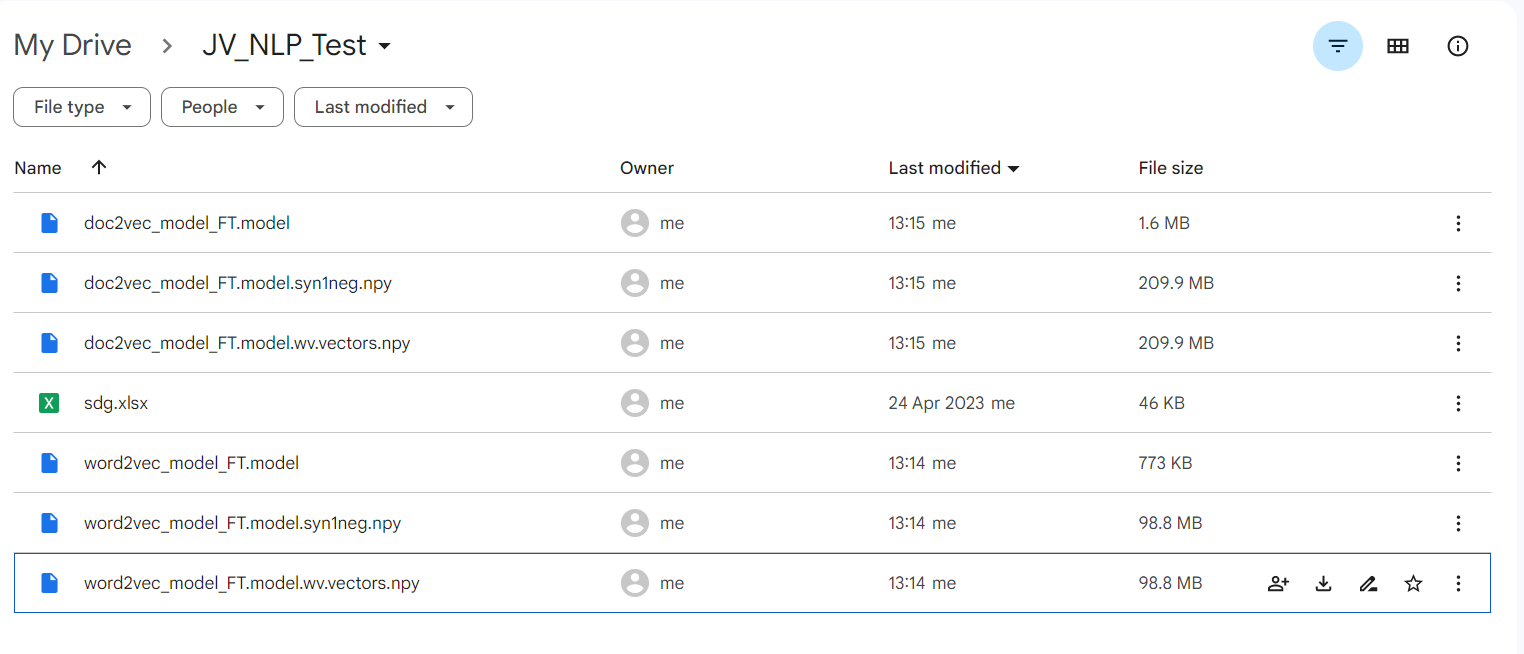
  - Following this you can run the 'Load all Packages and Requirements', before running the rest of the cells in the script and produicing the final results table. This may take several minutes in total.
 



In [2]:

print('Mounting google drive...')
from google.colab import drive
drive.mount('/content/drive')
%cd "/content/drive/MyDrive"
!mkdir JV_NLP_Test
%cd "/content/drive/MyDrive/JV_NLP_Test"

Mounting google drive...
Mounted at /content/drive
/content/drive/MyDrive
mkdir: cannot create directory ‘JV_NLP_Test’: File exists
/content/drive/MyDrive/JV_NLP_Test


# Load All Packages Requirements and Data 

In [3]:
!pip install gensim
!pip install sentence-transformers
!pip install sent2vec
!pip install numpy
!pip install spacy
!pip install transformers
!pip install torch
!pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 70.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 77.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 27.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 104.7 MB/s eta 0:00:00
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125942 sha256=4ece76e62dad9331b65245b2f5a756f7eb2294619bacb1552507010e33365ad2
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence-transformers
Looking in indexes: https://pypi.

In [4]:
import numpy as np
from datasets import load_dataset
from sklearn.model_selection import train_test_split
import datasets
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize
from sklearn.metrics.pairwise import cosine_similarity
import datasets
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

In [5]:
dataset = load_dataset("cnn_dailymail", "3.0.0",split="train[:250]")

nltk.download('punkt')  # download the necessary punkt tokenizer

new_dataset = []

for article in dataset:
    sentences = nltk.sent_tokenize(article["article"])
    article_dict = {"article": sentences, "highlights": article["highlights"]}
    new_dataset.append(article_dict)

Generating train split:   0%|          | 0/287113 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/13368 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/11490 [00:00<?, ? examples/s]

Dataset cnn_dailymail downloaded and prepared to /root/.cache/huggingface/datasets/cnn_dailymail/3.0.0/3.0.0/1b3c71476f6d152c31c1730e83ccb08bcf23e348233f4fcc11e182248e6bf7de. Subsequent calls will reuse this data.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [6]:
# Load the Excel file into a pandas dataframe
df = pd.read_excel('sdg.xlsx')

# Convert the dataframe to a list
sdg = df.to_dict('records')

sdg

[{'gpnum': 'gp01',
  'gpname': 'Life',
  'goalnum': 'goal01',
  'sentence': 'End poverty in all its forms everywhere'},
 {'gpnum': 'gp01',
  'gpname': 'Life',
  'goalnum': 'goal01',
  'sentence': 'Despite progress under the MDGs, approximately 17% of the world’s population – more than 1 billion people – still lives at or below $1.25 per day.'},
 {'gpnum': 'gp01',
  'gpname': 'Life',
  'goalnum': 'goal01',
  'sentence': 'Over the past decade, markets in developing countries have expanded dramatically, and the volume of funds flowing from the private sector to these countries now dwarfs that of foreign aid, making the private sector one of the most significant influencers of global poverty.  '},
 {'gpnum': 'gp01',
  'gpname': 'Life',
  'goalnum': 'goal01',
  'sentence': 'Certain groups are disproportionately represented among the poor, and face additional constraints – such as limited access to productive resources and markets – in escaping poverty.'},
 {'gpnum': 'gp01',
  'gpname': 'Lif

In [7]:
sdgname = []
for gpname in set([sdg_item['gpname'] for sdg_item in sdg]):
    # Get sentences for current gpname
    gp_sentences = [sdg_item['sentence'] for sdg_item in sdg if sdg_item['gpname'] == gpname]
    # Create new article for current gpname
    new_article = {'gpname': gpname, 'sentences': gp_sentences}
    # Add new article to sdgname
    sdgname.append(new_article)

In [8]:
test = load_dataset("cnn_dailymail", "3.0.0",split="test[:800]")

nltk.download('punkt')  # download the necessary punkt tokenizer

testset = []

for article in test:
    sentences = nltk.sent_tokenize(article["article"])
    article_dict = {"article": sentences, "highlights": article["highlights"]}
    testset.append(article_dict)

#appending testset with sdg labels

testset[1].update({'sgname_label': ['Social Development']})
testset[7].update({'sgname_label': ['Social Development']})
testset[9].update({'sgname_label': ['Environments']})
testset[17].update({'sgname_label': ['Social Development']})
testset[23].update({'sgname_label': ['Environments','Life']})
testset[26].update({'sgname_label': ['Social Development']})
testset[41].update({'sgname_label': ['Environments']})
testset[55].update({'sgname_label': ['Social Development']})
testset[58].update({'sgname_label': ['Social Development']})
testset[59].update({'sgname_label': ['Resources']})
testset[75].update({'sgname_label': ['Social Development']})
testset[76].update({'sgname_label': ['Equity']})
testset[114].update({'sgname_label': ['Environments']})
testset[118].update({'sgname_label': ['Equity']})
testset[125].update({'sgname_label': ['Equity']})
testset[132].update({'sgname_label': ['Equity']})
testset[137].update({'sgname_label': ['Equity']})
testset[138].update({'sgname_label': ['Equity']})
testset[147].update({'sgname_label': ['Resources']})
testset[156].update({'sgname_label': ['Equity']})
testset[157].update({'sgname_label': ['Resources']})
testset[158].update({'sgname_label': ['Equity']})
testset[165].update({'sgname_label': ['Environments']})
testset[178].update({'sgname_label': ['Economic and Technological Development']})
testset[182].update({'sgname_label': ['Equity']})
testset[185].update({'sgname_label': ['Life']})
testset[236].update({'sgname_label': ['Life']})
testset[249].update({'sgname_label': ['Social Development']})
testset[252].update({'sgname_label': ['Social Development']})
testset[269].update({'sgname_label': ['Social Development']})
testset[278].update({'sgname_label': ['Equity']})
testset[283].update({'sgname_label': ['Economic and Technological Development']})
testset[304].update({'sgname_label': ['Life']})
testset[309].update({'sgname_label': ['Economic and Technological Development']})
testset[320].update({'sgname_label': ['Environments']})
testset[357].update({'sgname_label': ['Environments']})
testset[372].update({'sgname_label': ['Life']})
testset[382].update({'sgname_label': ['Equity']})
testset[387].update({'sgname_label': ['Environments','Resources']})
testset[411].update({'sgname_label': ['Environments','Economic and Technological Development']})
testset[424].update({'sgname_label': ['Economic and Technological Development']})
testset[431].update({'sgname_label': ['Life']})
testset[446].update({'sgname_label': ['Environments']})
testset[447].update({'sgname_label': ['Economic and Technological Development']})
testset[451].update({'sgname_label': ['Environments']})
testset[452].update({'sgname_label': ['Life']})
testset[456].update({'sgname_label': ['Life']})
testset[466].update({'sgname_label': ['Environments']})
testset[479].update({'sgname_label': ['Environments']})
testset[492].update({'sgname_label': ['Life']})
testset[536].update({'sgname_label': ['Environments']})
testset[623].update({'sgname_label': ['Life']})
testset[657].update({'sgname_label': ['Life','Environments','Resources']})
testset[695].update({'sgname_label': ['Environments']})
testset[734].update({'sgname_label': ['Social Development']})
testset[750].update({'sgname_label': ['Equity']})
testset[781].update({'sgname_label': ['Economic and Technological Development']})


filtered_testset = [article for article in testset if 'sgname_label' in article]

print(len(filtered_testset))


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


57


In [9]:
from datasets import load_dataset
import nltk

test = load_dataset("cnn_dailymail", "3.0.0",split="test[:800]")

nltk.download('punkt')  # download the necessary punkt tokenizer

testset = []

for article in test:
    sentences = nltk.sent_tokenize(article["article"])
    article_dict = {"article": sentences, "highlights": article["highlights"]}
    testset.append(article_dict)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [10]:
for i, article in enumerate(testset):
    highlights = article['highlights']
    sentences = highlights.split('.\n')
    print(f"Article {i+1}:")
    for sentence in sentences:
        print(sentence.strip())
    print()


Article 1:
Membership gives the ICC jurisdiction over alleged crimes committed in Palestinian territories since last June
Israel and the United States opposed the move, which could open the door to war crimes investigations against Israelis .

Article 2:
Theia, a bully breed mix, was apparently hit by a car, whacked with a hammer and buried in a field
"She's a true miracle dog and she deserves a good life," says Sara Mellado, who is looking for a home for Theia .

Article 3:
Mohammad Javad Zarif has spent more time with John Kerry than any other foreign minister
He once participated in a takeover of the Iranian Consulate in San Francisco
The Iranian foreign minister tweets in English .

Article 4:
17 Americans were exposed to the Ebola virus while in Sierra Leone in March
Another person was diagnosed with the disease and taken to hospital in Maryland
National Institutes of Health says the patient is in fair condition after weeks of treatment .

Article 5:
Student is no longer on Duke U

In [11]:
#appending testset with sdg labels

testset[1].update({'sgname_label': ['Social Development']})
testset[7].update({'sgname_label': ['Social Development']})
testset[9].update({'sgname_label': ['Environments']})
testset[17].update({'sgname_label': ['Social Development']})
testset[23].update({'sgname_label': ['Environments','Life']})
testset[26].update({'sgname_label': ['Social Development']})
testset[41].update({'sgname_label': ['Environments']})
testset[55].update({'sgname_label': ['Social Development']})
testset[58].update({'sgname_label': ['Social Development']})
testset[59].update({'sgname_label': ['Resources']})
testset[75].update({'sgname_label': ['Social Development']})
testset[76].update({'sgname_label': ['Equity']})
testset[114].update({'sgname_label': ['Environments']})
testset[118].update({'sgname_label': ['Equity']})
testset[125].update({'sgname_label': ['Equity']})
testset[132].update({'sgname_label': ['Equity']})
testset[137].update({'sgname_label': ['Equity']})
testset[138].update({'sgname_label': ['Equity']})
testset[147].update({'sgname_label': ['Resources']})
testset[156].update({'sgname_label': ['Equity']})
testset[157].update({'sgname_label': ['Resources']})
testset[158].update({'sgname_label': ['Equity']})
testset[165].update({'sgname_label': ['Environments']})
testset[178].update({'sgname_label': ['Economic and Technological Development']})
testset[182].update({'sgname_label': ['Equity']})
testset[185].update({'sgname_label': ['Life']})
testset[236].update({'sgname_label': ['Life']})
testset[249].update({'sgname_label': ['Social Development']})
testset[252].update({'sgname_label': ['Social Development']})
testset[269].update({'sgname_label': ['Social Development']})
testset[278].update({'sgname_label': ['Equity']})
testset[283].update({'sgname_label': ['Economic and Technological Development']})
testset[304].update({'sgname_label': ['Life']})
testset[309].update({'sgname_label': ['Economic and Technological Development']})
testset[320].update({'sgname_label': ['Environments']})
testset[357].update({'sgname_label': ['Environments']})
testset[372].update({'sgname_label': ['Life']})
testset[382].update({'sgname_label': ['Equity']})
testset[387].update({'sgname_label': ['Environments','Resources']})
testset[411].update({'sgname_label': ['Environments','Economic and Technological Development']})
testset[424].update({'sgname_label': ['Economic and Technological Development']})
testset[431].update({'sgname_label': ['Life']})
testset[446].update({'sgname_label': ['Environments']})
testset[447].update({'sgname_label': ['Economic and Technological Development']})
testset[451].update({'sgname_label': ['Environments']})
testset[452].update({'sgname_label': ['Life']})
testset[456].update({'sgname_label': ['Life']})
testset[466].update({'sgname_label': ['Environments']})
testset[479].update({'sgname_label': ['Environments']})
testset[492].update({'sgname_label': ['Life']})
testset[536].update({'sgname_label': ['Environments']})
testset[623].update({'sgname_label': ['Life']})
testset[657].update({'sgname_label': ['Life','Environments','Resources']})
testset[695].update({'sgname_label': ['Environments']})
testset[734].update({'sgname_label': ['Social Development']})
testset[750].update({'sgname_label': ['Equity']})
testset[781].update({'sgname_label': ['Economic and Technological Development']})


In [12]:
filtered_testset = [article for article in testset if 'sgname_label' in article]

print(len(filtered_testset))

57


In [13]:
sdgname = []
for gpname in set([sdg['gpname'] for sdg in sdg]):
    # Get sentences for current gpname
    gp_sentences = [sdg['sentence'] for sdg in sdg if sdg['gpname'] == gpname]
    # Create new article for current gpname
    new_article = {'gpname': gpname, 'sentences': gp_sentences}
    # Add new article to sdgname
    sdgname.append(new_article)

# Word2Vec (Baseline)





In [25]:
from sent2vec.vectorizer import Vectorizer
from gensim.utils import simple_preprocess
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
from gensim.models import Word2Vec
from gensim.models.doc2vec import TaggedDocument

model = Word2Vec.load("word2vec_model_FT.model")


def get_sentence_embeddings(tokenized_sentences):
    embeddings = []
    for sentence in tokenized_sentences:
        valid_words = [word for word in sentence if word in model.wv]
        if valid_words:
            embeddings.append(np.mean([model.wv[word] for word in valid_words], axis=0))
        else:
            embeddings.append(np.zeros(model.vector_size))
    return np.vstack(embeddings)


# Group sentences by gpname
sdgname = []
for gpname in set([sdg_item['gpname'] for sdg_item in sdg]):
    # Get sentences for current gpname
    gp_sentences = [sdg_item['sentence'] for sdg_item in sdg if sdg_item['gpname'] == gpname]
    # Create new article for current gpname
    new_article = {'gpname': gpname, 'sentences': gp_sentences}
    # Add new article to sdgname
    sdgname.append(new_article)

# Get sentence similarity scores for every article in the new_dataset
for article in filtered_testset:
    # Get sentences from current article
    article_sentences = article['article']
# Calculate similarity between current article and each SDG topic
    similarities = []
    for topic in sdgname:
      topic_sentences = topic['sentences']
      tokenized_topic_sentences = [simple_preprocess(sentence) for sentence in topic_sentences]
      tokenized_article_sentences = [simple_preprocess(sentence) for sentence in article_sentences]
      topic_embeddings = get_sentence_embeddings(tokenized_topic_sentences)
      article_embeddings = get_sentence_embeddings(tokenized_article_sentences)
      similarity_score = cosine_similarity(topic_embeddings, article_embeddings)
      similarities.append({
        'gpname': topic['gpname'],
        'similarity_score': np.mean(similarity_score)
        })
    # Add similarity scores to article
    article['similarities_Word2Vec'] = similarities

# Print similarity scores for first article in new_dataset
print(filtered_testset[10]['similarities_Word2Vec'])


[{'gpname': 'Economic and Technological Development', 'similarity_score': 0.08255585}, {'gpname': 'Environments', 'similarity_score': 0.08752204}, {'gpname': 'Life', 'similarity_score': 0.10195255}, {'gpname': 'Equity', 'similarity_score': 0.09631166}, {'gpname': 'Resources', 'similarity_score': 0.10027}, {'gpname': 'Social Development', 'similarity_score': 0.09872588}]


In [26]:
num_topics = len(sdgname)
num_articles = len(filtered_testset)

# Loop over each article in the new dataset
for i, article in enumerate(filtered_testset):
    # Get the article's similarity scores
    similarities = article['similarities_Word2Vec']
    
    # Print the similarities list to check its structure
    print(f"Article {i+1} similarities:", similarities)
    

Article 1 similarities: [{'gpname': 'Economic and Technological Development', 'similarity_score': 0.0725245}, {'gpname': 'Environments', 'similarity_score': 0.07900821}, {'gpname': 'Life', 'similarity_score': 0.090828426}, {'gpname': 'Equity', 'similarity_score': 0.079673626}, {'gpname': 'Resources', 'similarity_score': 0.08597553}, {'gpname': 'Social Development', 'similarity_score': 0.087728046}]
Article 2 similarities: [{'gpname': 'Economic and Technological Development', 'similarity_score': 0.060639262}, {'gpname': 'Environments', 'similarity_score': 0.062518924}, {'gpname': 'Life', 'similarity_score': 0.076235555}, {'gpname': 'Equity', 'similarity_score': 0.06849758}, {'gpname': 'Resources', 'similarity_score': 0.06826567}, {'gpname': 'Social Development', 'similarity_score': 0.07238617}]
Article 3 similarities: [{'gpname': 'Economic and Technological Development', 'similarity_score': 0.07862446}, {'gpname': 'Environments', 'similarity_score': 0.08040746}, {'gpname': 'Life', 'simi

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support

# Initialize the count of correct predictions
correct_predictions_Word2Vec = 0

# Add this line to store the true and predicted labels
y_true_Word2Vec, y_pred_Word2Vec = [], []

# Iterate through each article in the filtered_testset and its corresponding similarity scores in `similarities`
for article, similarities in zip(filtered_testset, [article['similarities_Word2Vec'] for article in filtered_testset]):
    actual_sdg_names = article['sgname_label']
    predicted_sdg_name = max(similarities, key=lambda x: x['similarity_score'])['gpname']

    if predicted_sdg_name in actual_sdg_names:
        correct_predictions_Word2Vec += 1

    # Store the true and predicted labels (choose the first actual label if there are multiple)
    y_true_Word2Vec.append(actual_sdg_names[0])
    y_pred_Word2Vec.append(predicted_sdg_name)

accuracy_Word2Vec = correct_predictions_Word2Vec / len(filtered_testset) * 100
print(f"The accuracy of the algorithm is: {accuracy_Word2Vec:.2f}%")

# Calculate precision, recall, and F1 score using precision_recall_fscore_support
precision_Word2Vec, recall_Word2Vec, f1_score_Word2Vec, _  = precision_recall_fscore_support(y_true_Word2Vec, y_pred_Word2Vec, average='weighted', zero_division=0)

precision_Word2Vec = precision_Word2Vec *100 
recall_Word2Vec = recall_Word2Vec*100 
f1_score_Word2Vec = f1_score_Word2Vec*100 

print(f"The precision of the algorithm is: {precision_Word2Vec:.2f}%")
print(f"The recall of the algorithm is: {recall_Word2Vec:.2f}%")
print(f"The F1 score of the algorithm is: {f1_score_Word2Vec:.2f}%")


The accuracy of the algorithm is: 21.05%
The precision of the algorithm is: 4.34%
The recall of the algorithm is: 17.54%
The F1 score of the algorithm is: 6.90%


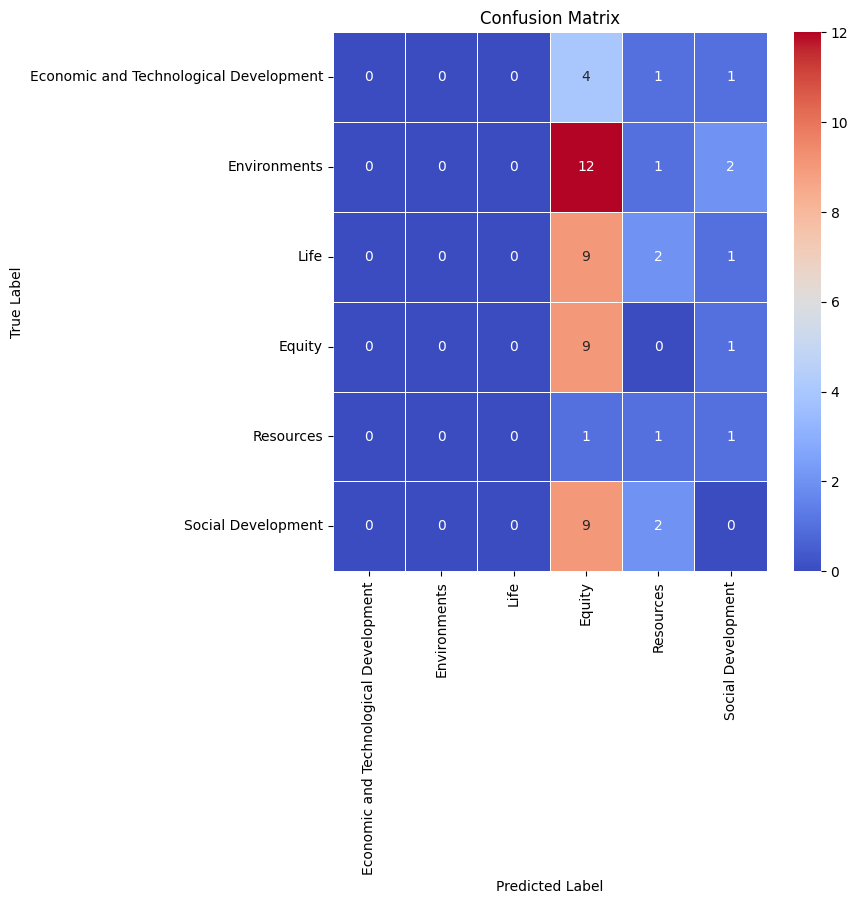

In [28]:
# Compute the confusion matrix
cm = confusion_matrix(y_true_Word2Vec, y_pred_Word2Vec)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(7, 7))
sns.heatmap(cm, annot=True, fmt='d',cmap='coolwarm', xticklabels=set(y_true_Word2Vec), yticklabels=set(y_true_Word2Vec),linewidths=0.5)


plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')

plt.show()

# SentBERT - Pretrained package

In [29]:
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

model = SentenceTransformer('bert-base-nli-mean-tokens')

# Group sentences by gpname
sdgname = []
for gpname in set([sdg['gpname'] for sdg in sdg]):
    # Get sentences for current gpname
    gp_sentences = [sdg['sentence'] for sdg in sdg if sdg['gpname'] == gpname]
    # Create new article for current gpname
    new_article = {'gpname': gpname, 'sentences': gp_sentences}
    # Add new article to sdgname
    sdgname.append(new_article)

# Get sentence similarity scores for every article in the new_dataset
for article in filtered_testset:
    # Get sentences from current article
    article_sentences = article['article']
    # Calculate similarity between current article and each SDG topic
    similarities = []
    for topic in sdgname:
        topic_sentences = topic['sentences']
        topic_embeddings = model.encode(topic_sentences)
        article_embeddings = model.encode(article_sentences)
        similarity_scores = cosine_similarity(topic_embeddings, article_embeddings)
        similarities.append({
            'gpname': topic['gpname'],
            'similarity_score': np.mean(similarity_scores)
        })
    # Add similarity scores to article
    article['similarities_SentBERT'] = similarities

# Print similarity scores for first article in new_dataset
print(filtered_testset[10]['similarities_SentBERT'])


[{'gpname': 'Economic and Technological Development', 'similarity_score': 0.29418993}, {'gpname': 'Environments', 'similarity_score': 0.28564587}, {'gpname': 'Life', 'similarity_score': 0.2912445}, {'gpname': 'Equity', 'similarity_score': 0.29864672}, {'gpname': 'Resources', 'similarity_score': 0.2809082}, {'gpname': 'Social Development', 'similarity_score': 0.2994609}]


In [30]:
num_topics = len(sdgname)
num_articles = len(filtered_testset)

# Loop over each article in the new dataset
for i, article in enumerate(filtered_testset):
    # Get the article's similarity scores
    similarities = article['similarities_SentBERT']
    
    # Print the similarities list to check its structure
    print(f"Article {i+1} similarities:", similarities)
    


Article 1 similarities: [{'gpname': 'Economic and Technological Development', 'similarity_score': 0.23535967}, {'gpname': 'Environments', 'similarity_score': 0.23510101}, {'gpname': 'Life', 'similarity_score': 0.27106288}, {'gpname': 'Equity', 'similarity_score': 0.25936756}, {'gpname': 'Resources', 'similarity_score': 0.23938838}, {'gpname': 'Social Development', 'similarity_score': 0.23528112}]
Article 2 similarities: [{'gpname': 'Economic and Technological Development', 'similarity_score': 0.24903972}, {'gpname': 'Environments', 'similarity_score': 0.2374699}, {'gpname': 'Life', 'similarity_score': 0.25687906}, {'gpname': 'Equity', 'similarity_score': 0.2474196}, {'gpname': 'Resources', 'similarity_score': 0.24007507}, {'gpname': 'Social Development', 'similarity_score': 0.23161747}]
Article 3 similarities: [{'gpname': 'Economic and Technological Development', 'similarity_score': 0.23649812}, {'gpname': 'Environments', 'similarity_score': 0.20135793}, {'gpname': 'Life', 'similarity_

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Initialize the count of correct predictions
correct_predictions_SentBERT = 0

# Add this line to store the true and predicted labels
y_true_SentBERT, y_pred_SentBERT = [], []

# Iterate through each article in the filtered_testset and its corresponding similarity scores in `similarities`
for article, similarities in zip(filtered_testset, [article['similarities_SentBERT'] for article in filtered_testset]):
    actual_sdg_names = article['sgname_label']
    predicted_sdg_name = max(similarities, key=lambda x: x['similarity_score'])['gpname']
    
    if predicted_sdg_name in actual_sdg_names:
        correct_predictions_SentBERT += 1

    # Store the true and predicted labels (choose the first actual label if there are multiple)
    y_true_SentBERT.append(actual_sdg_names[0])
    y_pred_SentBERT.append(predicted_sdg_name)

accuracy_SentBERT = correct_predictions_SentBERT / len(filtered_testset) * 100
print(f"The accuracy of the algorithm is: {accuracy_SentBERT:.2f}%")

precision_SentBERT, recall_SentBERT, f1_score_SentBERT, _ = precision_recall_fscore_support(y_true_SentBERT, y_pred_SentBERT, average='weighted', zero_division=0)

precision_SentBERT = precision_SentBERT*100
recall_SentBERT = recall_SentBERT*100
f1_score_SentBERT = f1_score_SentBERT*100

print(f"The precision of the algorithm is: {precision_SentBERT:.2f}%")
print(f"The recall of the algorithm is: {recall_SentBERT:.2f}%")
print(f"The F1 score of the algorithm is: {f1_score_SentBERT:.2f}%")



The accuracy of the algorithm is: 24.56%
The precision of the algorithm is: 23.93%
The recall of the algorithm is: 22.81%
The F1 score of the algorithm is: 18.85%


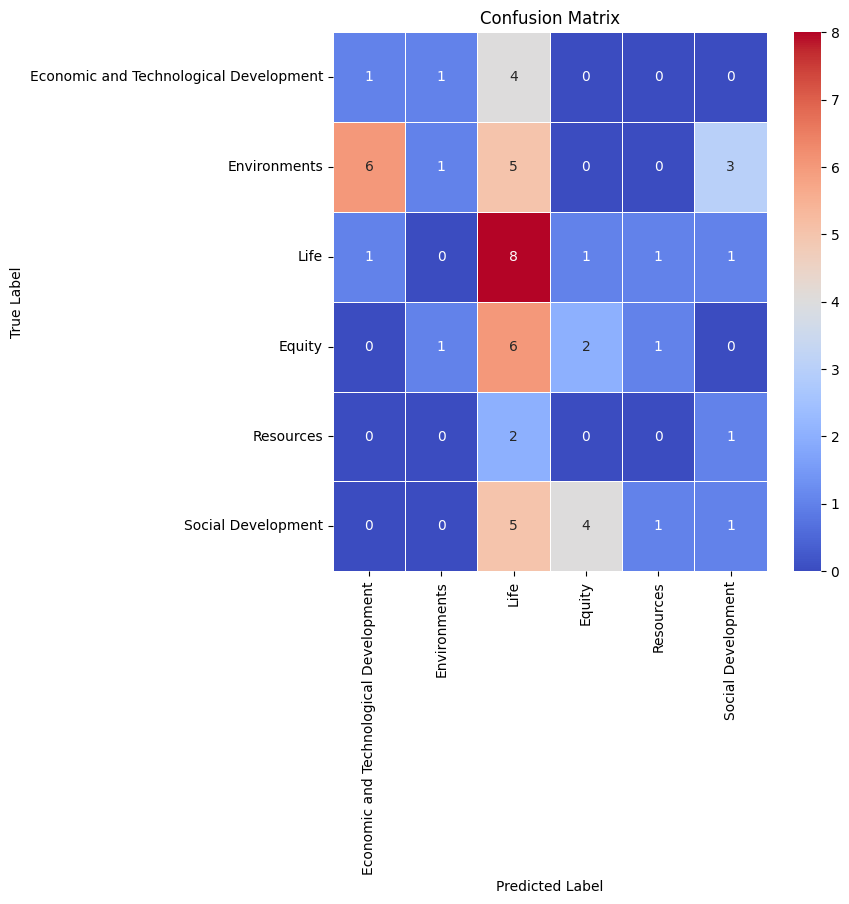

In [34]:
# Compute the confusion matrix
cm = confusion_matrix(y_true_SentBERT, y_pred_SentBERT)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(7, 7))
sns.heatmap(cm, annot=True, fmt='d',cmap='coolwarm', xticklabels=set(y_true_SentBERT), yticklabels=set(y_true_SentBERT),linewidths=0.5)


plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')

plt.show()

# Doc2Vec - Skip-Gram

In [15]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

model = Doc2Vec.load("doc2vec_model_FT.model")


# Get sentence similarity scores for every article in the new_dataset
for article in filtered_testset:
    # Concatenate all sentences in the article into a single string
    article_text = ' '.join(article['article'])
    
    # Calculate similarity between current article and each SDG topic
    similarities = []
    for topic in sdgname:
        topic_sentences = topic['sentences']
        topic_text = ' '.join(topic_sentences)
        topic_embedding = model.infer_vector(topic_text.split())
        article_embedding = model.infer_vector(article_text.split())
        similarity_score = cosine_similarity(topic_embedding.reshape(1, -1), article_embedding.reshape(1, -1))[0][0]
        similarities.append({
            'gpname': topic['gpname'],
            'similarity_score': similarity_score
        })
        
    # Add similarity scores to article
    article['similarities_Doc2Vecsk'] = similarities

# Print similarity scores for first article in new_dataset
print(filtered_testset[10]['similarities_Doc2Vecsk'])


[{'gpname': 'Economic and Technological Development', 'similarity_score': 0.0049856}, {'gpname': 'Environments', 'similarity_score': 0.02918047}, {'gpname': 'Life', 'similarity_score': 0.08959955}, {'gpname': 'Equity', 'similarity_score': 0.048519846}, {'gpname': 'Resources', 'similarity_score': 0.08467582}, {'gpname': 'Social Development', 'similarity_score': -0.026133616}]


In [16]:
num_topics = len(sdgname)
num_articles = len(filtered_testset)

# Loop over each article in the new dataset
for i, article in enumerate(filtered_testset):
    # Get the article's similarity scores
    similarities = article['similarities_Doc2Vecsk']
    
    # Print the similarities list to check its structure
    print(f"Article {i+1} similarities:", similarities)
    

Article 1 similarities: [{'gpname': 'Economic and Technological Development', 'similarity_score': 0.2873649}, {'gpname': 'Environments', 'similarity_score': 0.29238185}, {'gpname': 'Life', 'similarity_score': 0.21552427}, {'gpname': 'Equity', 'similarity_score': 0.28477392}, {'gpname': 'Resources', 'similarity_score': 0.19996876}, {'gpname': 'Social Development', 'similarity_score': 0.35618904}]
Article 2 similarities: [{'gpname': 'Economic and Technological Development', 'similarity_score': 0.19859402}, {'gpname': 'Environments', 'similarity_score': 0.2544215}, {'gpname': 'Life', 'similarity_score': 0.16829182}, {'gpname': 'Equity', 'similarity_score': 0.20620638}, {'gpname': 'Resources', 'similarity_score': 0.17709474}, {'gpname': 'Social Development', 'similarity_score': 0.24487512}]
Article 3 similarities: [{'gpname': 'Economic and Technological Development', 'similarity_score': 0.34242076}, {'gpname': 'Environments', 'similarity_score': 0.3912983}, {'gpname': 'Life', 'similarity_s

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Initialize the count of correct predictions
correct_predictions_Doc2Vec_sg = 0

# Add this line to store the true and predicted labels
y_true_Doc2Vec_sg, y_pred_Doc2Vec_sg = [], []

# Iterate through each article in the filtered_testset and its corresponding similarity scores in `similarities`
for article, similarities in zip(filtered_testset, [article['similarities_Doc2Vecsk'] for article in filtered_testset]):
    actual_sdg_names = article['sgname_label']
    predicted_sdg_name = max(similarities, key=lambda x: x['similarity_score'])['gpname']
    
    if predicted_sdg_name in actual_sdg_names:
        correct_predictions_Doc2Vec_sg += 1

    # Store the true and predicted labels (choose the first actual label if there are multiple)
    y_true_Doc2Vec_sg.append(actual_sdg_names[0])
    y_pred_Doc2Vec_sg.append(predicted_sdg_name)

accuracy_Doc2Vec_sg = correct_predictions_Doc2Vec_sg / len(filtered_testset) * 100
print(f"The accuracy of the algorithm is: {accuracy_Doc2Vec_sg:.2f}%")

precision_Doc2Vec_sg, recall_Doc2Vec_sg, f1_score_Doc2Vec_sg, _ = precision_recall_fscore_support(y_true_Doc2Vec_sg, y_pred_Doc2Vec_sg, average='weighted', zero_division=0)

precision_Doc2Vec_sg = precision_Doc2Vec_sg*100
recall_Doc2Vec_sg = recall_Doc2Vec_sg *100
f1_score_Doc2Vec_sg = f1_score_Doc2Vec_sg *100 

print(f"The precision of the algorithm is: {precision_Doc2Vec_sg:.2f}%")
print(f"The recall of the algorithm is: {recall_Doc2Vec_sg:.2f}%")
print(f"The F1 score of the algorithm is: {f1_score_Doc2Vec_sg:.2f}%")


The accuracy of the algorithm is: 22.81%
The precision of the algorithm is: 29.30%
The recall of the algorithm is: 21.05%
The F1 score of the algorithm is: 21.53%


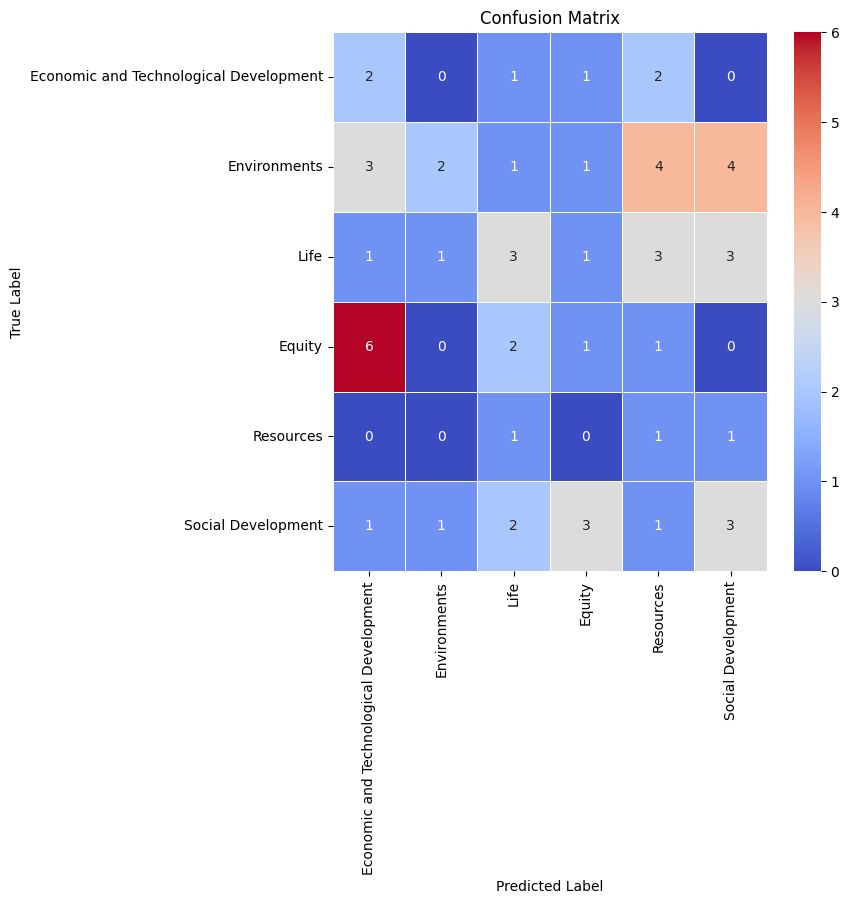

In [23]:
# Compute the confusion matrix
cm = confusion_matrix(y_true_Doc2Vec_sg, y_pred_Doc2Vec_sg)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(7, 7))
sns.heatmap(cm, annot=True, fmt='d',cmap='coolwarm', xticklabels=set(y_true_Doc2Vec_sg), yticklabels=set(y_true_Doc2Vec_sg),linewidths=0.5)


plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')

plt.show()

# Results


In [37]:
FT_accuracy_dict = {'Word2Vec Skip Gram': [accuracy_Word2Vec, precision_Word2Vec, recall_Word2Vec, f1_score_Word2Vec],
                    'SentBERT': [accuracy_SentBERT, precision_SentBERT, recall_SentBERT, f1_score_SentBERT],
                    'Doc2Vec Skip Gram': [accuracy_Doc2Vec_sg, precision_Doc2Vec_sg, recall_Doc2Vec_sg, f1_score_Doc2Vec_sg]}

FT_accuracy_df = pd.DataFrame(FT_accuracy_dict, index=['Accuracy', 'Precision', 'Recall', 'F1 Score'])


In [38]:
FT_accuracy_df = FT_accuracy_df.T
FT_accuracy_df

,Accuracy,Precision,Recall,F1 Score
Word2Vec Skip Gram,21.052632,4.340396,17.543860,6.900585
SentBERT,24.561404,23.930660,22.807018,18.846135
Doc2Vec Skip Gram,22.807018,29.301137,21.052632,21.526755


In [39]:
FT_accuracy_df = FT_accuracy_df.T
FT_accuracy_df.to_csv('FinalTestResults.csv')